# 2. Exploratory Data Analysis (EDA)

In [1]:
# format code
# pip install nb_black
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from lib.nlp_yt import sw
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

<IPython.core.display.Javascript object>

In [3]:
data = pd.read_pickle("data/pickle/split_dtm.pkl")
data = data.transpose()  # DTM -> TDM
data.head

<bound method NDFrame.head of            2019-05  2019-06  2019-07  2019-08  2019-09  2019-10  2019-11  \
aa              15        8        1        0        0        0        0   
aachen          18       12        3        3        0        1        0   
aaliyah          0        0        0        0        0        0        0   
ab            3421      366       79       65       47       16       42   
aba             11        1        0        1        0        1        0   
...            ...      ...      ...      ...      ...      ...      ...   
übrigends       15        1        0        0        0        0        0   
übrigens      1338      221       37       30       16        9       14   
übriges         11        1        0        0        1        0        0   
übt              9        4        0        0        0        0        0   
übung            5        1        2        1        0        0        0   

           2019-12  2020-01  2020-02  ...  2020-11  2020-

<IPython.core.display.Javascript object>

In [4]:
# additional stop words
stop_words_add = sw.get_stop_words_add()
data.drop(index=stop_words_add, inplace=True)

<IPython.core.display.Javascript object>

In [5]:
# top20 after additional stopwords
top_dict = {}

for c in data.columns:
    top = data[c].sort_values(ascending=False).head(20)
    top_dict[c] = list(zip(top.index, top.values))

top_dict

{'2019-05': [('cdu', 21547),
  ('rezo', 14524),
  ('wählen', 14469),
  ('menschen', 12039),
  ('gut', 11796),
  ('partei', 10765),
  ('deutschland', 10683),
  ('danke', 10536),
  ('politik', 10391),
  ('grünen', 9332),
  ('afd', 8671),
  ('leute', 8290),
  ('parteien', 7692),
  ('bitte', 7284),
  ('meinung', 6868),
  ('wirklich', 6837),
  ('welt', 6361),
  ('politiker', 6130),
  ('spd', 5978),
  ('leider', 5814)],
 '2019-06': [('video', 2855),
  ('rezo', 2387),
  ('grünen', 1476),
  ('cdu', 1450),
  ('menschen', 1361),
  ('deutschland', 1154),
  ('gut', 1135),
  ('meinung', 919),
  ('leute', 862),
  ('welt', 840),
  ('klimawandel', 815),
  ('politik', 800),
  ('bitte', 771),
  ('warum', 749),
  ('schmidt', 726),
  ('wirklich', 720),
  ('afd', 697),
  ('jahren', 672),
  ('klima', 613),
  ('thema', 599)],
 '2019-07': [('rezo', 350),
  ('video', 330),
  ('menschen', 254),
  ('cdu', 245),
  ('gut', 227),
  ('deutschland', 192),
  ('grünen', 188),
  ('schmidt', 182),
  ('klimawandel', 152),

<IPython.core.display.Javascript object>

In [6]:
for month, top_words in top_dict.items():
    print(f"### {month}")
    print(", ".join([word for word, count in top_words[:20]]))
    print("\n")

### 2019-05
cdu, rezo, wählen, menschen, gut, partei, deutschland, danke, politik, grünen, afd, leute, parteien, bitte, meinung, wirklich, welt, politiker, spd, leider


### 2019-06
video, rezo, grünen, cdu, menschen, deutschland, gut, meinung, leute, welt, klimawandel, politik, bitte, warum, schmidt, wirklich, afd, jahren, klima, thema


### 2019-07
rezo, video, menschen, cdu, gut, deutschland, grünen, schmidt, klimawandel, afd, bitte, leute, meinung, welt, janich, politik, warum, klima, wirklich, recht


### 2019-08
video, rezo, menschen, schmidt, cdu, deutschland, gut, afd, grünen, bitte, warum, leute, wirklich, erde, klimawandel, welt, richtig, politik, meinung, jahren


### 2019-09
video, menschen, rezo, grünen, afd, wirklich, cdu, bitte, leute, warum, gut, klimawandel, deutschland, leben, welt, meinung, partei, recht, echt, erst


### 2019-10
video, rezo, menschen, cdu, meinung, afd, deutschland, gut, bernd, leute, youtube, partei, grünen, wirklich, welt, klimawandel, wählen, pol

<IPython.core.display.Javascript object>

In [7]:
stop_words_union = sw.get_stop_words()

data_clean = pd.read_pickle("data/pickle/df_corpus_cleaned.pkl")

cv = CountVectorizer(stop_words=stop_words_union, dtype=np.int16)
data_cv = cv.fit_transform(data_clean.comment)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

<IPython.core.display.Javascript object>

In [16]:
pickle.dump(cv, open("data/pickle/cv_stop.pkl", "wb"))
data_stop.to_pickle("data/pickle/dtm_stop.pkl")

<IPython.core.display.Javascript object>

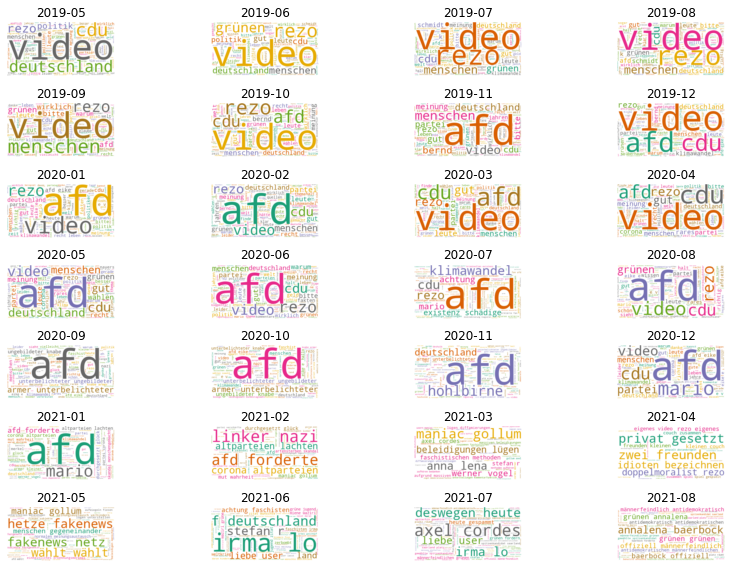

<IPython.core.display.Javascript object>

In [38]:
wc = WordCloud(
    stopwords=stop_words_union,
    background_color="white",
    colormap="Dark2",
    max_font_size=150,
    random_state=100,
)
row_indices = []
col_indices = []
for i in range(7):
    col_indices.extend([0, 1, 2, 3])
    row_indices.extend(4 * [i])
assert (len(row_indices) == len(col_indices)) and (len(col_indices) == 28)

fig, axes = plt.subplots(nrows=7, ncols=4)

for index, month in enumerate(data.columns):
    ri = row_indices[index]
    ci = col_indices[index]
    wc.generate(data_clean.loc[month]["comment"])
    axes[ri][ci].imshow(wc, interpolation="bilinear")
    axes[ri][ci].axis("off")
    axes[ri][ci].set_title(month)
    wc.to_file("data/png/month/" + month + ".png")

plt.tight_layout()
plt.show()

In [8]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
# plt.rcParams["figure.figsize"] = [12, 8]
# plt.rcParams["figure.dpi"] = 100

<IPython.core.display.Javascript object>

In [9]:
series_sum_abs = data.transpose().abs().sum(axis=1)

<IPython.core.display.Javascript object>

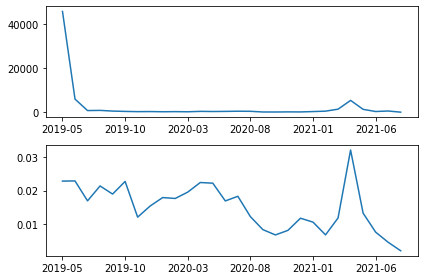

<IPython.core.display.Javascript object>

In [20]:
data_rezo = data.transpose()[
    ["rezo", "video", "youtube", "kanal", "medien", "rezzo", "reichweite"]
]
series_rezo_abs = data_rezo.abs().sum(axis=1)
series_rezo_rel = series_rezo_abs.divide(series_sum_abs)
df_rezo_abs = series_rezo_abs.to_frame()
df_rezo_rel = series_rezo_rel.to_frame()

fig, axes = plt.subplots(nrows=2, ncols=1)
df_rezo_abs.plot(ax=axes[0])
axes[0].get_legend().remove()
# axes[0].set_ylabel("absolute frequency")
df_rezo_rel.plot(ax=axes[1])
axes[1].get_legend().remove()
# axes[1].set_ylabel("relative frequency")
# fig.suptitle("rezo-video reference words", fontsize=14)
fig.tight_layout()
# ax = series_rezo_rel.plot.bar()
fig.savefig("data/pdf/eda/eda_rezo.pdf", bbox_inches="tight")

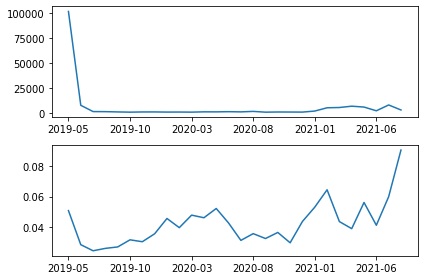

<IPython.core.display.Javascript object>

In [19]:
data_parties = data.transpose()[
    [
        "cdu",
        "csu",
        "grünen",
        "grüne",
        "spd",
        "fdp",
        "linken",
        "linke",
        "afd",
        "spitzenkandidat",
        "wählen",
        "gewählte",
        "wählt",
        "partei",
        "politik",
        "politiker",
        "altparteien",
        "wählerstimmen",
        "regierungskoalition",
        "gehtwaehlen",
        "wahlmacht",
        "wahlwerbung",
        "bundestagswahl",
        "parteiprogramm",
        "partein",
        "landtagswahl",
        "bundestagswahlkampf",
    ]
]
series_parties_abs = data_parties.abs().sum(axis=1)
series_parties_rel = series_parties_abs.divide(series_sum_abs)
df_parties_abs = series_parties_abs.to_frame()
df_parties_rel = series_parties_rel.to_frame()

fig, axes = plt.subplots(nrows=2, ncols=1)
df_parties_abs.plot(ax=axes[0])
axes[0].get_legend().remove()
# axes[0].set_ylabel("absolute frequency")
df_parties_rel.plot(ax=axes[1])
axes[1].get_legend().remove()
# axes[1].set_ylabel("relative frequency")
# fig.suptitle("party and election words", fontsize=14)
fig.tight_layout()
# ax = series_parties_rel.plot.bar()
fig.savefig("data/pdf/eda/eda_parties.pdf", bbox_inches="tight")

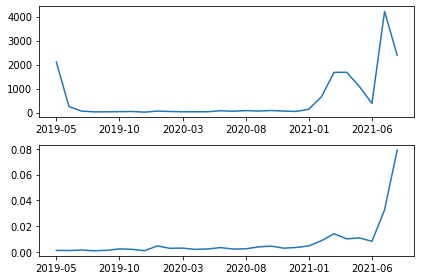

<IPython.core.display.Javascript object>

In [29]:
data_politicians = data.transpose()[
    [
        # Bundestagswahl 2021
        "spitzenkandidat",
        "baerbock",
        "annalena",
        "armin",
        "laschet",
        "robert",
        "habeck",
        "olaf",
        "scholz",
        "christian",
        "lindner",
        "alice",
        "weidel",
        # Europawahl 2019
        "manfred",
        "weber",
        "barley",
        "ska",
        "keller",
        "meuthen",
        "beer",
        # Video
        "mortler",
        "gabriel",
        "axel",
        "voss",
        "hohlmeier",
        "storch",
        "gauland",
        "höcke",
        # Other
        "waziri",
    ]
]
series_politicians_abs = data_politicians.abs().sum(axis=1)
series_politicians_rel = series_politicians_abs.divide(series_sum_abs)
df_politicians_abs = series_politicians_abs.to_frame()
df_politicians_rel = series_politicians_rel.to_frame()

fig, axes = plt.subplots(nrows=2, ncols=1)
df_politicians_abs.plot(ax=axes[0])
axes[0].get_legend().remove()
# axes[0].set_ylabel("absolute frequency")
df_politicians_rel.plot(ax=axes[1])
axes[1].get_legend().remove()
# axes[1].set_ylabel("relative frequency")
# fig.suptitle("politician names", fontsize=14)
fig.tight_layout()
# ax = series_politicians_rel.plot.bar()
fig.savefig("data/pdf/eda/eda_politicians.pdf", bbox_inches="tight")

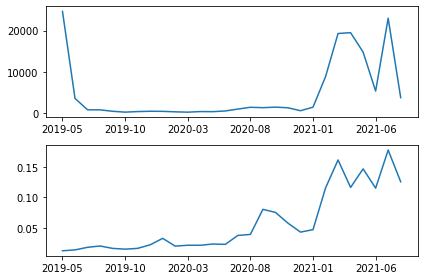

<IPython.core.display.Javascript object>

In [22]:
data_negative = data.transpose()[
    [
        "armer",
        "unterbelichteter",
        "ungebildeter",
        "nazi",
        "nationalsozialistische",
        "faschist",
        "hohlbirne",
        "linker",
        "lügen",
        "gollum",
        "beleidigen",
        "beleidigungen",
        "beleidigt",
        "unterstellungen",
        "unterstellen",
        "faschistischen",
        "knabe",
        "antifa",
        "idioten",
        "volksverpetzer",
        "propaganda",
        "troll",
        "ideologie",
        "ideologien",
        "vogel",
        "fakenews",
        "hetze",
        "maniac",
        "antidemokratischen",
        "männerfeindlich",
        "antidemokratisch",
        "männerfeindlichen",
        "subjekte",
        "marionette",
        "kleinreden",
        "quacksalber",
        "realsatire",
        "kiddy",
        "menschenverachtend",
        "dullies",
        "halbwahrheiten",
        "heuchlerischen",
        "heucheln",
        "grütze",
        "vergewaltigt",
        "lämmer",
        "löschte",
        "destruktiv",
        "spamattacke",
        "tränen",
        "grütze",
        "linksradikalen",
        "meinungsdiktatur",
        "kloppen",
        "manipulatoren",
        "widerlich",
        "verkommen",
        "hindern",
        "verhindern",
        "ekelhaften",
        "birne",
        "kleinen",
        "weltkrieg",
        "dummheit",
        "dumm",
        "schwachsinn",
        "unsinn",
        "bomben",
        "terror",
        "diffamierungen",
        "schuld",
        "angst",
        "schlimm",
        "böse",
        "schlechter",
        "faul",
        "bot",
        "lügner",
        "versager",
        "klimaspinner",
        "schattenregierung",
        "finanzdiktatur",
        "problem",
        "demagogen",
        "scheisse",
        "mist",
        "infantilen",
        "deppen",
        "rechtsextremen",
        "bullshit",
        "pöbeln",
        "nsdap",
        "stasi",
        "kriminalität",
        "krieg",
        "diffamiert",
        "brauner",
        "afdhochburgen",
        "afdwählerschaft",
        "antisemiten",
        "rausgeschmissen",
        "jammerst",
        "lachnummer",
        "rezofanboys",
        "gewalt",
        "blamiert",
        "schrei",
        "fake",
        "nwort",
    ]
]

series_negative_abs = data_negative.abs().sum(axis=1)
series_negative_rel = series_negative_abs.divide(series_sum_abs)
df_negative_abs = series_negative_abs.to_frame()
df_negative_rel = series_negative_rel.to_frame()

fig, axes = plt.subplots(nrows=2, ncols=1)
df_negative_abs.plot(ax=axes[0])
axes[0].get_legend().remove()
# axes[0].set_ylabel("absolute frequency")
df_negative_rel.plot(ax=axes[1])
axes[1].get_legend().remove()
# axes[1].set_ylabel("relative frequency")
# fig.suptitle("negative words", fontsize=14)
fig.tight_layout()
# ax = series_negative_rel.plot.bar()
fig.savefig("data/pdf/eda/eda_negative.pdf", bbox_inches="tight")

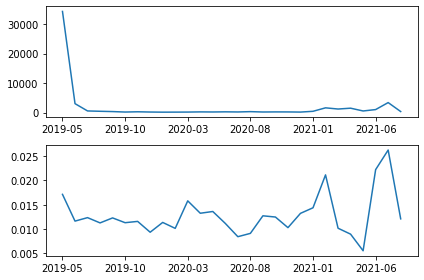

<IPython.core.display.Javascript object>

In [23]:
data_positive = data.transpose()[
    [
        "bitte",
        "gut",
        "danke",
        "anständig",
        "liebe",
        "glück",
        "schön",
        "fantastische",
        "dankbar",
        "frei",
    ]
]

series_positive_abs = data_positive.abs().sum(axis=1)
series_positive_rel = series_positive_abs.divide(series_sum_abs)
df_positive_abs = series_positive_abs.to_frame()
df_positive_rel = series_positive_rel.to_frame()

fig, axes = plt.subplots(nrows=2, ncols=1)
df_positive_abs.plot(ax=axes[0])
axes[0].get_legend().remove()
# axes[0].set_ylabel("absolute frequency")
df_positive_rel.plot(ax=axes[1])
axes[1].get_legend().remove()
# axes[1].set_ylabel("relative frequency")
# fig.suptitle("positive words", fontsize=14)
fig.tight_layout()
# ax = series_positive_rel.plot.bar()
fig.savefig("data/pdf/eda/eda_positive.pdf", bbox_inches="tight")

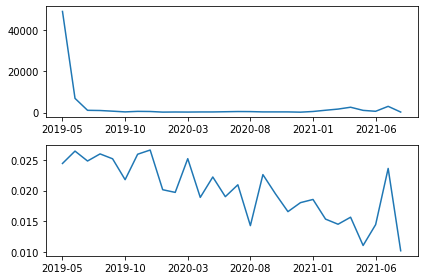

<IPython.core.display.Javascript object>

In [28]:
data_climate = data.transpose()[
    [
        "welt",
        "erde",
        "klimawandel",
        "klima",
        "leben",
        "existenz",
        "klimaskeptikern",
        "globalisierung",
        "solarparks",
        "naturgesetze",
        "generation",
        "atmosphäre",
        "wissenschaft",
        "wissenschaftlich",
        "wissenschaftliche",
        "strom",
        "energie",
        "energien",
        "kohle",
        "temperatur",
        "eu",
        "zukunft",
        "jugend",
        "china",
        "friday",
        "futur",
        "umweltschutz",
        "wärmer",
        "klimasensitivität",
        "co²",
        "treibhauseffekt",
        "wissenschaftler",
        "fotosynthese",
        "verschwörungstheorien",
        "klimaforscher",
        "ozonloch",
        "geoengineering",
        "pflanzen",
        "methan",
        "anthropogenen",
        "celsius",
        "erwärmt",
    ]
]

series_climate_abs = data_climate.abs().sum(axis=1)
series_climate_rel = series_climate_abs.divide(series_sum_abs)
df_climate_abs = series_climate_abs.to_frame()
df_climate_rel = series_climate_rel.to_frame()

fig, axes = plt.subplots(nrows=2, ncols=1)
df_climate_abs.plot(ax=axes[0])
axes[0].get_legend().remove()
# axes[0].set_ylabel("absolute frequency")
df_climate_rel.plot(ax=axes[1])
axes[1].get_legend().remove()
# axes[1].set_ylabel("relative frequency")
# fig.suptitle("climate related words", fontsize=14)
fig.tight_layout()
# ax = series_climate_rel.plot.bar()
fig.savefig("data/pdf/eda/eda_climate.pdf", bbox_inches="tight")

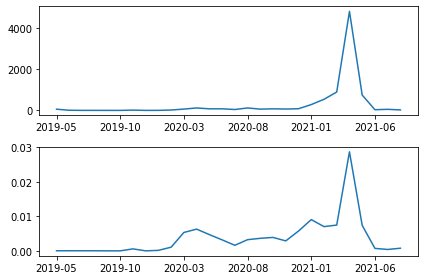

<IPython.core.display.Javascript object>

In [27]:
data_corona = data.transpose()[
    [
        "corona",
        "coronavirus",
        "coronaregeln",
        "abstandsregeln",
        "coronazahlen",
        "impfen",
        "impfung",
        "covid",
        "getestet",
        "genesen",
        "inzidenz",
        "pandemie",
        "quarantäne",
        "sars",
        "impfstoff",
    ]
]
series_corona_abs = data_corona.abs().sum(axis=1)
series_corona_rel = series_corona_abs.divide(series_sum_abs)
df_corona_abs = series_corona_abs.to_frame()
df_corona_rel = series_corona_rel.to_frame()

fig, axes = plt.subplots(nrows=2, ncols=1)
df_corona_abs.plot(ax=axes[0])
axes[0].get_legend().remove()
# axes[0].set_ylabel("absolute frequency")
df_corona_rel.plot(ax=axes[1])
axes[1].get_legend().remove()
# axes[1].set_ylabel("relative frequency")
# fig.suptitle("corona related words", fontsize=14)
fig.tight_layout()
# ax = series_corona_rel.plot.bar()
fig.savefig("data/pdf/eda/eda_corona.pdf", bbox_inches="tight")